# Мультиномиальная регрессия на pytorch

## Попов Артём

In [1]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

Загрузка данных:

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [6]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


Создание итераторов по данным:

In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [13]:
iter(trainloader).next()[0].size()

torch.Size([4, 3, 32, 32])

Вспомогательные функции:

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

truck  ship  deer plane


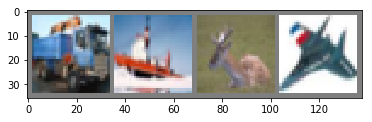

In [15]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Создание модели:

In [16]:
from torch.autograd import Variable

In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = self.fc1(x)
        x = F.softmax(x, dim=1)
        return x


net = Net()

Задание метода оптимизации и функции потерь:

In [23]:
criterion = nn.CrossEntropyLoss()

In [24]:
import torch.optim as optim

In [25]:
optimizer = optim.SGD(net.parameters(), lr=0.001)

Обучение:

In [28]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.122
[1,  4000] loss: 2.118
[1,  6000] loss: 2.114
[1,  8000] loss: 2.114
[1, 10000] loss: 2.110
[1, 12000] loss: 2.120
Finished Training


In [29]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 37 %


In [60]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 43 %
Accuracy of   car : 44 %
Accuracy of  bird : 25 %
Accuracy of   cat : 16 %
Accuracy of  deer : 28 %
Accuracy of   dog : 34 %
Accuracy of  frog : 55 %
Accuracy of horse : 41 %
Accuracy of  ship : 56 %
Accuracy of truck : 50 %
